<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Time_Series_Decomposition_and_different_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
from datetime import datetime
import seaborn as sns

In [159]:
from google.colab import files
uploaded = files.upload()

Saving amazon_revenue_profit.csv to amazon_revenue_profit (3).csv


In [160]:
df1 = pd.read_csv('amazon_revenue_profit.csv')  

In [161]:
df1['Quarter'] = pd.to_datetime(df1.Quarter)
print (df1)

      Quarter  Revenue  Net Income
0  2020-03-31    75452        2535
1  2019-12-31    87437        3268
2  2019-09-30    69981        2134
3  2019-06-30    63404        2625
4  2019-03-31    59700        3561
..        ...      ...         ...
56 2006-03-31     2279          51
57 2005-12-31     2977         199
58 2005-09-30     1858          30
59 2005-06-30     1753          52
60 2005-03-31     1902          78

[61 rows x 3 columns]


In [162]:
df1.dtypes

Quarter       datetime64[ns]
Revenue                int64
Net Income             int64
dtype: object

In [163]:
df1.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [164]:
df1.set_index('Quarter')

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561
...,...,...
2006-03-31,2279,51
2005-12-31,2977,199
2005-09-30,1858,30


In [165]:
df1.shape

(61, 3)

In [166]:
figure = px.line(df1, x='Quarter', y='Revenue', title='Sales Slider')

figure.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="3y", step="year", stepmode="todate"),
            dict(count=3, label="5y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
figure.show()

In [167]:
#kpss test - detrmining if the time series is stationary around mean or linear time

from statsmodels.tsa.stattools import kpss

In [168]:
kpss_test = kpss(df1['Revenue'],'ct')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [169]:
kpss_test

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

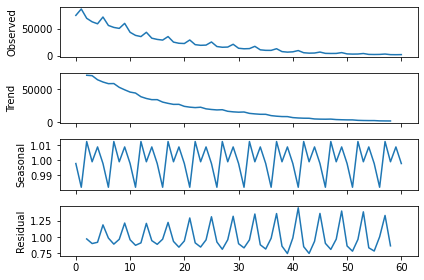

In [170]:
import statsmodels.api as sm

ts = sm.tsa.seasonal_decompose(df1['Revenue'], 
                               model='mutliplicative',freq=5)


residual_plot =ts.plot()

In [171]:
ts.observed

0     75452
1     87437
2     69981
3     63404
4     59700
      ...  
56     2279
57     2977
58     1858
59     1753
60     1902
Name: Revenue, Length: 61, dtype: int64

In [172]:
ts.seasonal

0     0.997793
1     0.982141
2     1.012333
3     0.998969
4     1.008763
        ...   
56    0.982141
57    1.012333
58    0.998969
59    1.008763
60    0.997793
Name: Revenue, Length: 61, dtype: float64

In [173]:
ts.resid

0          NaN
1          NaN
2     0.970976
3     0.899243
4     0.918840
        ...   
56    1.003650
57    1.335967
58    0.863552
59         NaN
60         NaN
Name: Revenue, Length: 61, dtype: float64

In [174]:
ts.trend

0         NaN
1         NaN
2     71194.8
3     70581.0
4     64408.8
       ...   
56     2312.0
57     2201.2
58     2153.8
59        NaN
60        NaN
Name: Revenue, Length: 61, dtype: float64

In [175]:
ts.observed[2]

69981

In [176]:
ts.resid[2]*ts.seasonal[2]*ts.trend[2]

69980.99999999999

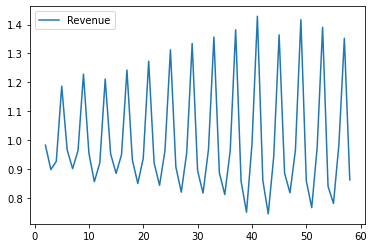

In [177]:
pd.DataFrame(ts.observed/ts.trend).plot();

In [178]:
df1

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561
...,...,...,...
56,2006-03-31,2279,51
57,2005-12-31,2977,199
58,2005-09-30,1858,30
59,2005-06-30,1753,52


In [179]:
df_new = df1.drop(columns=['Net Income'])

In [180]:
df_new

,Quarter,Revenue
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [184]:
df_new.index = pd.to_datetime(df_new.index, unit='s')

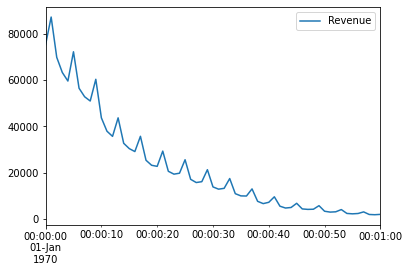

In [185]:
#RESAMPLING
df_new.resample('S').mean().plot();

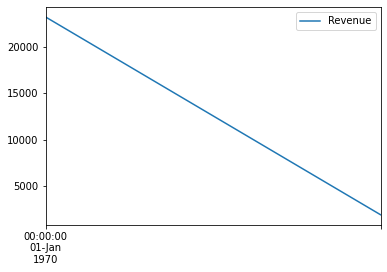

In [186]:
df_new.resample('T').mean().plot();

In [187]:
df_new[:5]

,Quarter,Revenue
1970-01-01 00:00:00,2020-03-31,75452
1970-01-01 00:00:01,2019-12-31,87437
1970-01-01 00:00:02,2019-09-30,69981
1970-01-01 00:00:03,2019-06-30,63404
1970-01-01 00:00:04,2019-03-31,59700


In [188]:
df_new[:5].diff(2)

,Quarter,Revenue
1970-01-01 00:00:00,NaT,NaN
1970-01-01 00:00:01,NaT,NaN
1970-01-01 00:00:02,-183 days,-5471.0
1970-01-01 00:00:03,-184 days,-24033.0
1970-01-01 00:00:04,-183 days,-10281.0


In [191]:
df_new

,Quarter,Revenue
1970-01-01 00:00:00,2020-03-31,75452
1970-01-01 00:00:01,2019-12-31,87437
1970-01-01 00:00:02,2019-09-30,69981
1970-01-01 00:00:03,2019-06-30,63404
1970-01-01 00:00:04,2019-03-31,59700
...,...,...
1970-01-01 00:00:56,2006-03-31,2279
1970-01-01 00:00:57,2005-12-31,2977
1970-01-01 00:00:58,2005-09-30,1858
1970-01-01 00:00:59,2005-06-30,1753


In [190]:
df_new[:5].shift()

,Quarter,Revenue
1970-01-01 00:00:00,NaT,NaN
1970-01-01 00:00:01,2020-03-31,75452.0
1970-01-01 00:00:02,2019-12-31,87437.0
1970-01-01 00:00:03,2019-09-30,69981.0
1970-01-01 00:00:04,2019-06-30,63404.0


In [194]:
df_new[:5].tshift(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



,Quarter,Revenue
1970-01-01 00:00:10,2020-03-31,75452
1970-01-01 00:00:11,2019-12-31,87437
1970-01-01 00:00:12,2019-09-30,69981
1970-01-01 00:00:13,2019-06-30,63404
1970-01-01 00:00:14,2019-03-31,59700


In [196]:
df_new[:5] - df_new[:5].shift(2)

,Quarter,Revenue
1970-01-01 00:00:00,NaT,NaN
1970-01-01 00:00:01,NaT,NaN
1970-01-01 00:00:02,-183 days,-5471.0
1970-01-01 00:00:03,-184 days,-24033.0
1970-01-01 00:00:04,-183 days,-10281.0


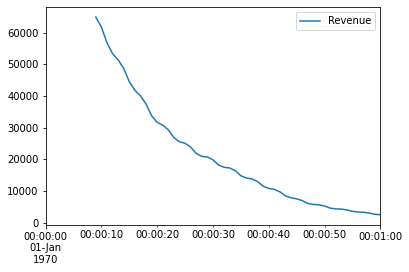

In [199]:
df_new.resample('S').mean().rolling(window=10).mean().plot()

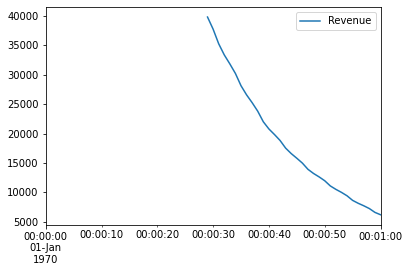

In [206]:
df_new.rolling(window=30, win_type='gaussian').mean(std=500).plot()